In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np


In [2]:
file_path2 = "관악구_부동산_데이터.csv"
df = pd.read_csv(file_path2)
df.head()

,법정동코드,법정동명,지번구분명,건물명,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,건축년도,건물용도,연도,월,일,분기,요일,건물면적(평),평당 가격(만원)
0,10100,봉천동,대지,가든빌라가,2024-10-15,22200,49.14,35.00,1.0,1988.0,연립다세대,2024,10,15,4,1,14.890909,1490.842491
1,10200,신림동,대지,신사타운빌,2024-10-15,40500,39.26,24.00,2.0,2016.0,연립다세대,2024,10,15,4,1,11.896970,3404.228222
2,10100,봉천동,대지,그린피아 오피스텔,2024-10-14,10000,25.84,33.56,3.0,2002.0,오피스텔,2024,10,14,4,0,7.830303,1277.089783
3,10200,신림동,대지,우석빌라14차,2024-10-12,16700,27.22,11.00,4.0,1995.0,연립다세대,2024,10,12,4,5,8.248485,2024.614254
4,10100,봉천동,대지,신원메트로빌,2024-10-12,24200,36.93,47.01,5.0,2006.0,오피스텔,2024,10,12,4,5,11.190909,2162.469537


In [15]:
from matplotlib import rc
import matplotlib.font_manager as fm

fe = fm.FontEntry(
    fname=r'NanumGothic.otf',name='NanumGothic')                       
fm.fontManager.ttflist.insert(0, fe)     
plt.rcParams.update({'font.size': 12, 'font.family': 'NanumGothic'})

# EDA (탐색적 데이터 분석)

In [12]:
# Step 1: 데이터 정보 및 통계 요약
df.info()  # 데이터 타입 및 결측치 확인
df.describe()  # 수치형 데이터의 기초 통계량

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78730 entries, 0 to 78729
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   법정동코드      78730 non-null  int64  
 1   법정동명       78730 non-null  object 
 2   지번구분명      78730 non-null  object 
 3   건물명        78730 non-null  object 
 4   계약일        78730 non-null  object 
 5   물건금액(만원)   78730 non-null  int64  
 6   건물면적(㎡)    78730 non-null  float64
 7   토지면적(㎡)    78730 non-null  float64
 8   층          78730 non-null  float64
 9   건축년도       78730 non-null  float64
 10  건물용도       78730 non-null  object 
 11  연도         78730 non-null  int64  
 12  월          78730 non-null  int64  
 13  일          78730 non-null  int64  
 14  분기         78730 non-null  int64  
 15  요일         78730 non-null  int64  
 16  건물면적(평)    78730 non-null  float64
 17  평당 가격(만원)  78730 non-null  float64
dtypes: float64(6), int64(7), object(5)
memory usage: 10.8+ MB


,법정동코드,물건금액(만원),건물면적(㎡),토지면적(㎡),층,건축년도,연도,월,일,분기,요일,건물면적(평),평당 가격(만원)
count,78730.000000,78730.000000,78730.000000,78730.000000,78730.000000,78730.000000,78730.000000,78730.000000,78730.000000,78730.000000,78730.000000,78730.000000,78730.000000
mean,10154.923155,25436.955544,56.046342,32.058395,5.441636,2000.624654,2013.578991,6.350260,15.742512,2.445319,2.668614,16.983740,1569.648865
std,59.071123,14036.470161,24.502950,10.900187,5.291525,9.079035,5.238051,3.333445,8.742992,1.102612,1.893305,7.425136,737.983829
min,10100.000000,1300.000000,9.260000,3.380000,-2.000000,1970.000000,2006.000000,1.000000,1.000000,1.000000,0.000000,2.806061,52.952503
25%,10100.000000,14500.000000,37.890000,25.550000,2.000000,1993.000000,2009.000000,3.000000,8.000000,1.000000,1.000000,11.481818,1088.723931
50%,10100.000000,23000.000000,57.550000,34.884297,4.000000,2002.000000,2014.000000,6.000000,16.000000,2.000000,3.000000,17.439394,1427.713015
75%,10200.000000,33500.000000,71.460000,34.884297,7.000000,2005.000000,2018.000000,9.000000,23.000000,3.000000,4.000000,21.654545,1854.014385
max,10300.000000,73800.000000,140.100000,173.050000,29.000000,2024.000000,2024.000000,12.000000,31.000000,4.000000,6.000000,42.454545,8485.714286


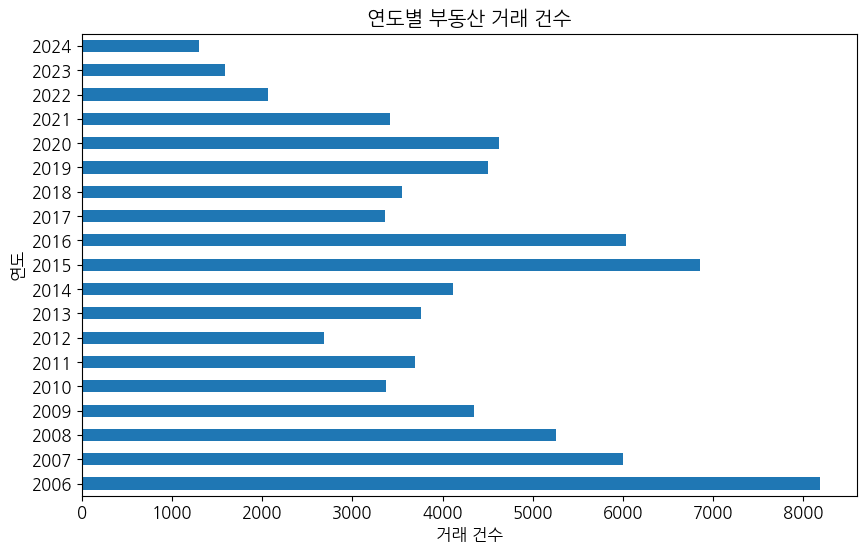

In [35]:
# 2. 연도별 거래 건수 시각화
plt.figure(figsize=(10, 6))
df['연도'].value_counts().sort_index().plot(kind='barh')
plt.title('연도별 부동산 거래 건수')
plt.xlabel('거래 건수')
plt.ylabel('연도')
plt.xticks(rotation=0)
plt.show()

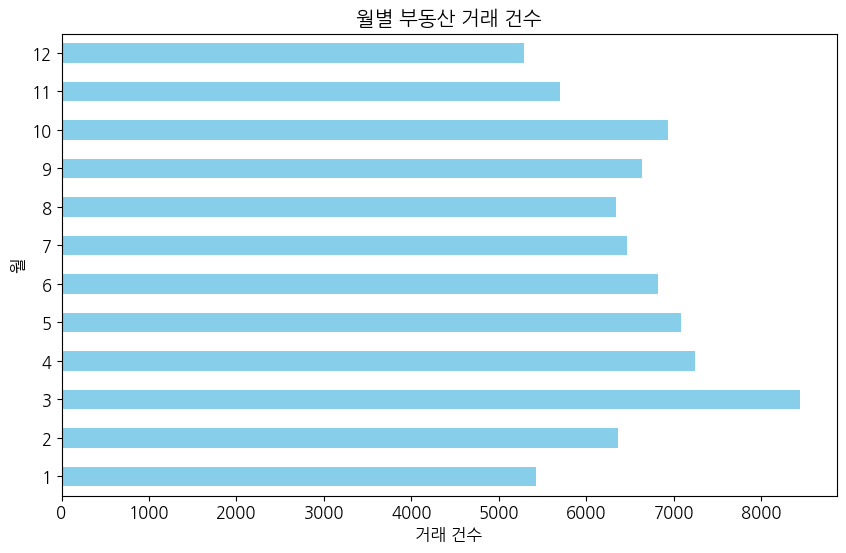

In [37]:
# 3. 월별 거래 건수 시각화
plt.figure(figsize=(10, 6))
df['월'].value_counts().sort_index().plot(kind='barh', color='skyblue')
plt.title('월별 부동산 거래 건수')
plt.xlabel('거래 건수')
plt.ylabel('월')
plt.xticks(rotation=0)
plt.show()

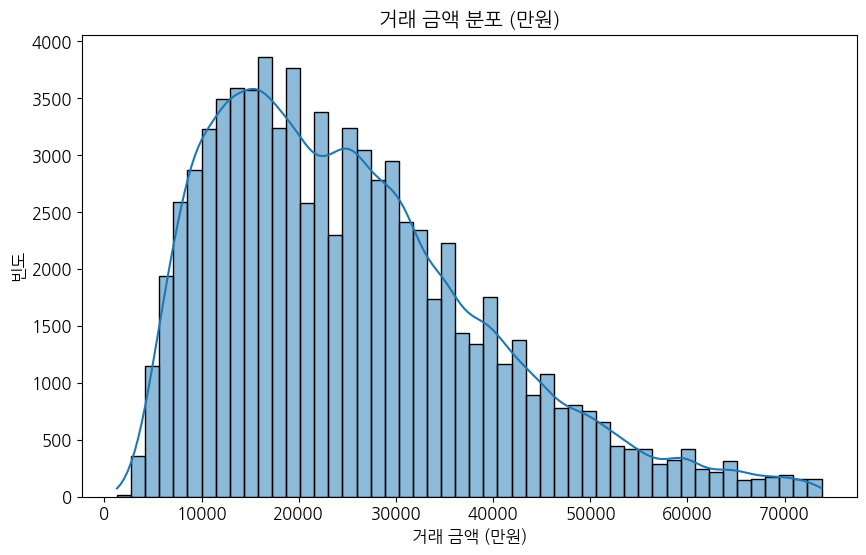

In [38]:
# 4. 거래 금액의 분포 (히스토그램)
plt.figure(figsize=(10, 6))
sns.histplot(df['물건금액(만원)'], bins=50, kde=True, color='skyblue')
plt.title('거래 금액 분포 (만원)')
plt.xlabel('거래 금액 (만원)')
plt.ylabel('빈도')
plt.show()


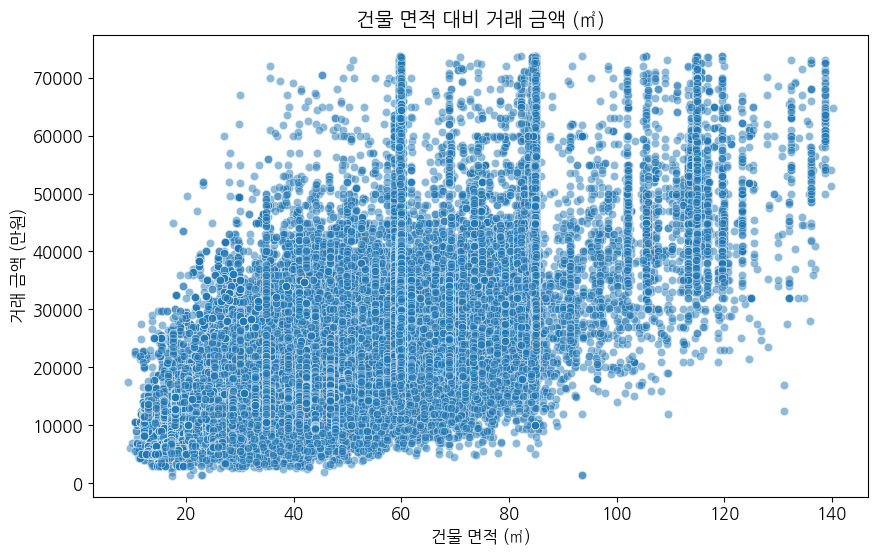

In [40]:
# 5. 건물 면적 대비 거래 금액 시각화 (산점도)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='건물면적(㎡)', y='물건금액(만원)', data=df, alpha=0.5)
plt.title('건물 면적 대비 거래 금액 (㎡)')
plt.xlabel('건물 면적 (㎡)')
plt.ylabel('거래 금액 (만원)')
plt.show()


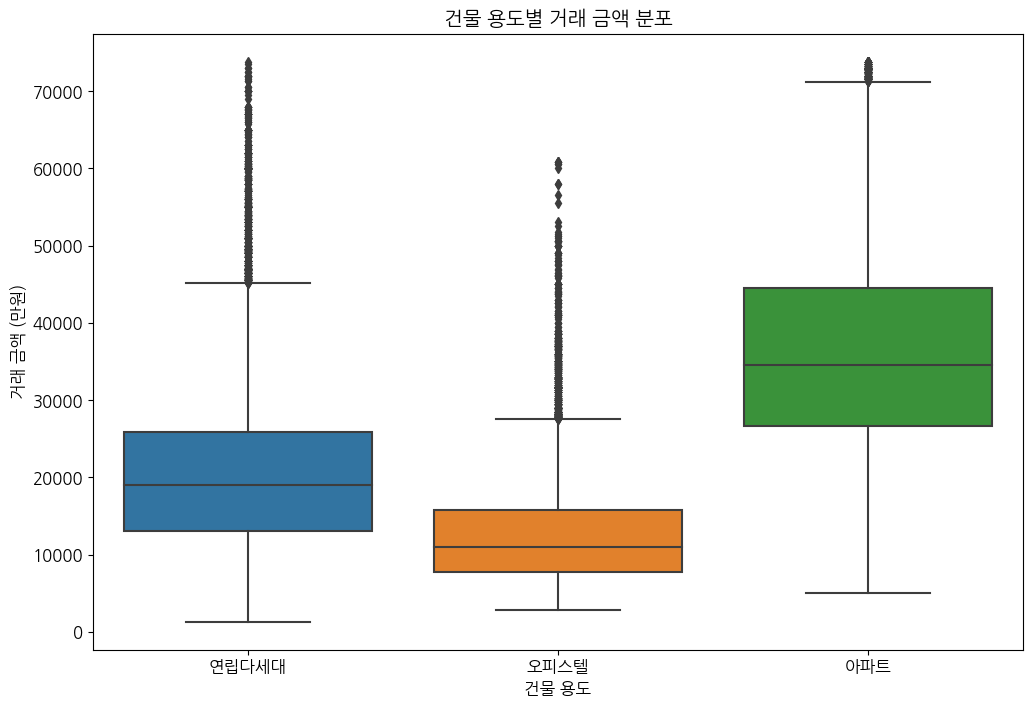

In [42]:
# 6. 건물 용도별 거래 금액의 박스플롯
plt.figure(figsize=(12, 8))
sns.boxplot(x='건물용도', y='물건금액(만원)', data=df)
plt.title('건물 용도별 거래 금액 분포')
plt.xlabel('건물 용도')
plt.ylabel('거래 금액 (만원)')
plt.show()

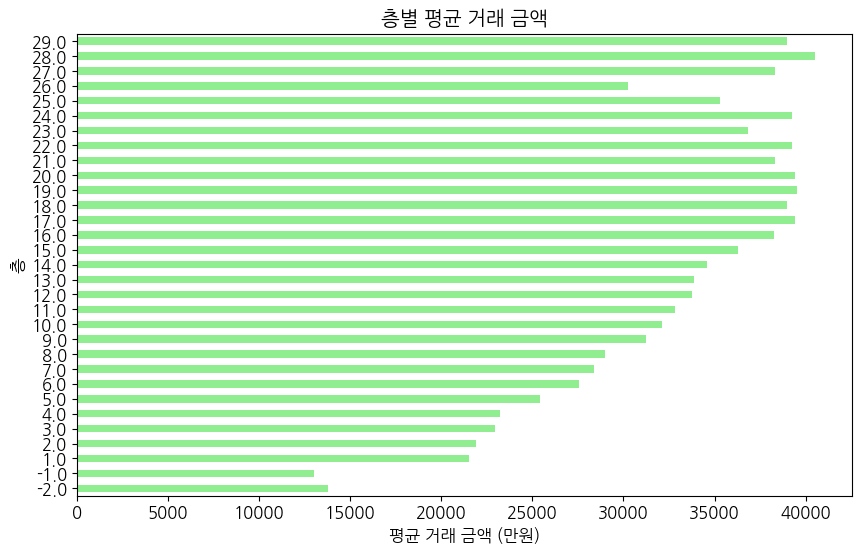

In [43]:
# 7. 층별 거래 금액의 평균 확인 (층수별 평균 금액 시각화)
plt.figure(figsize=(10, 6))
df.groupby('층')['물건금액(만원)'].mean().plot(kind='barh', color='lightgreen')
plt.title('층별 평균 거래 금액')
plt.ylabel('층')
plt.xlabel('평균 거래 금액 (만원)')
plt.xticks(rotation=0)
plt.show()

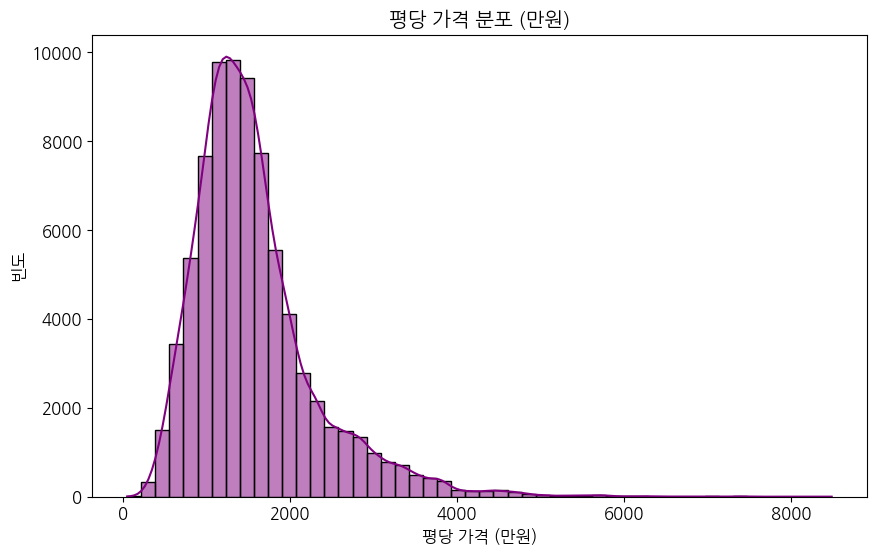

In [44]:
# 8. 평당 가격(만원) 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(df['평당 가격(만원)'], bins=50, kde=True, color='purple')
plt.title('평당 가격 분포 (만원)')
plt.xlabel('평당 가격 (만원)')
plt.ylabel('빈도')
plt.show()


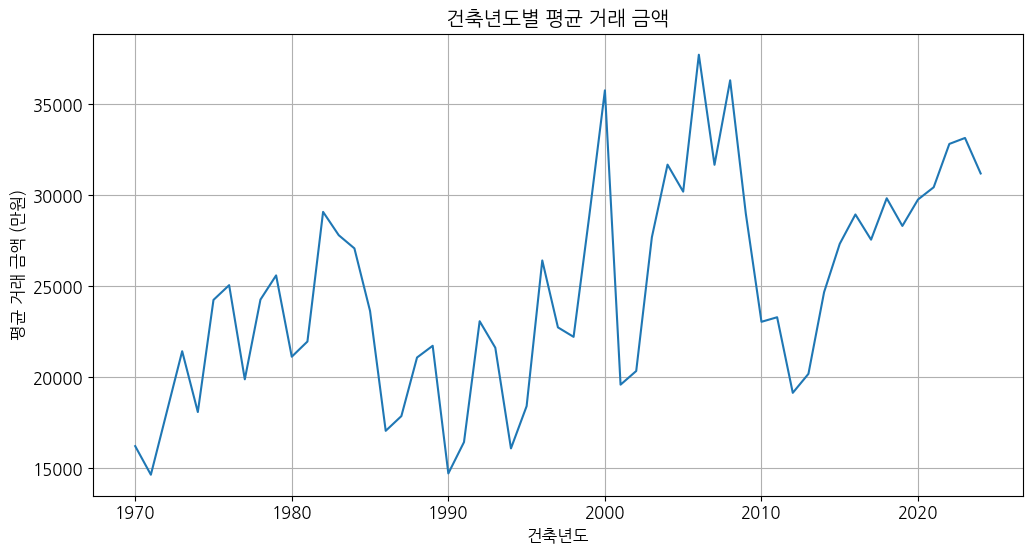

In [46]:

# 9. 건축년도별 평균 거래 금액 시각화
plt.figure(figsize=(12, 6))
df.groupby('건축년도')['물건금액(만원)'].mean().plot(kind='line')
plt.title('건축년도별 평균 거래 금액')
plt.xlabel('건축년도')
plt.ylabel('평균 거래 금액 (만원)')
plt.grid(True)
plt.show()


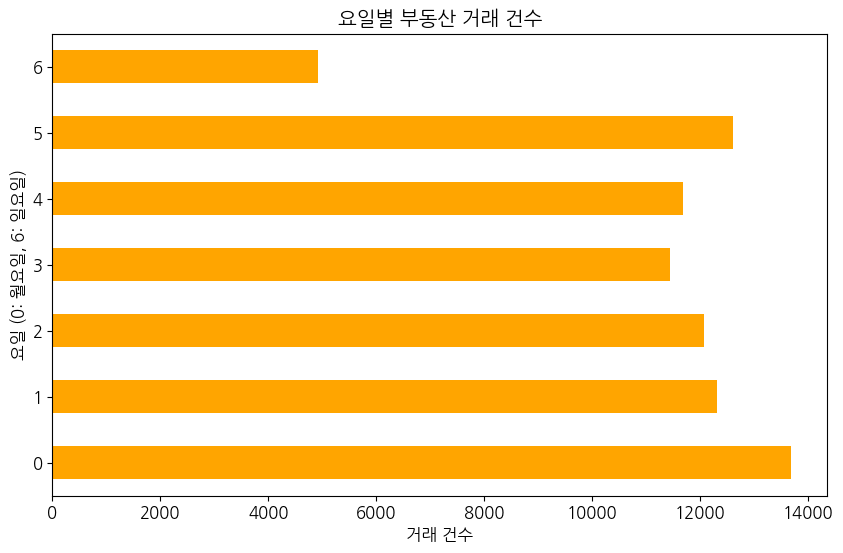

In [47]:
# 10. 요일별 거래 건수 시각화
plt.figure(figsize=(10, 6))
df['요일'].value_counts().sort_index().plot(kind='barh', color='orange')
plt.title('요일별 부동산 거래 건수')
plt.xlabel('거래 건수')
plt.ylabel('요일 (0: 월요일, 6: 일요일)')
plt.xticks(rotation=0)
plt.show()

# 주택 판매 가격 예측 모델링 준비 (전처리)

In [52]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [67]:
# 데이터 로드 (df2 사용)
df2 = df.copy()

In [68]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78730 entries, 0 to 78729
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   법정동코드      78730 non-null  int64  
 1   법정동명       78730 non-null  object 
 2   지번구분명      78730 non-null  object 
 3   건물명        78730 non-null  object 
 4   계약일        78730 non-null  object 
 5   물건금액(만원)   78730 non-null  int64  
 6   건물면적(㎡)    78730 non-null  float64
 7   토지면적(㎡)    78730 non-null  float64
 8   층          78730 non-null  float64
 9   건축년도       78730 non-null  float64
 10  건물용도       78730 non-null  object 
 11  연도         78730 non-null  int64  
 12  월          78730 non-null  int64  
 13  일          78730 non-null  int64  
 14  분기         78730 non-null  int64  
 15  요일         78730 non-null  int64  
 16  건물면적(평)    78730 non-null  float64
 17  평당 가격(만원)  78730 non-null  float64
dtypes: float64(6), int64(7), object(5)
memory usage: 10.8+ MB


In [69]:
df2.iloc[0]

법정동코드              10100
법정동명                 봉천동
지번구분명                 대지
건물명                가든빌라가
계약일           2024-10-15
물건금액(만원)           22200
건물면적(㎡)            49.14
토지면적(㎡)             35.0
층                    1.0
건축년도              1988.0
건물용도               연립다세대
연도                  2024
월                     10
일                     15
분기                     4
요일                     1
건물면적(평)        14.890909
평당 가격(만원)    1490.842491
Name: 0, dtype: object

In [70]:
df2.head()

,법정동코드,법정동명,지번구분명,건물명,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,건축년도,건물용도,연도,월,일,분기,요일,건물면적(평),평당 가격(만원)
0,10100,봉천동,대지,가든빌라가,2024-10-15,22200,49.14,35.00,1.0,1988.0,연립다세대,2024,10,15,4,1,14.890909,1490.842491
1,10200,신림동,대지,신사타운빌,2024-10-15,40500,39.26,24.00,2.0,2016.0,연립다세대,2024,10,15,4,1,11.896970,3404.228222
2,10100,봉천동,대지,그린피아 오피스텔,2024-10-14,10000,25.84,33.56,3.0,2002.0,오피스텔,2024,10,14,4,0,7.830303,1277.089783
3,10200,신림동,대지,우석빌라14차,2024-10-12,16700,27.22,11.00,4.0,1995.0,연립다세대,2024,10,12,4,5,8.248485,2024.614254
4,10100,봉천동,대지,신원메트로빌,2024-10-12,24200,36.93,47.01,5.0,2006.0,오피스텔,2024,10,12,4,5,11.190909,2162.469537


In [72]:
# 0. 불필요한 열 제거
# 분석에 불필요한 열인 '법정동코드', '일', '건물명'은 제거
columns_to_drop = ['법정동코드','건물명','일']
df2.drop(columns=columns_to_drop, axis=1, inplace=True)

In [73]:
# 1. 결측치 처리
# 수치형 변수 결측치는 중앙값으로 대체하고, 범주형 변수 결측치는 최빈값으로 대체
numeric_features = ['건물면적(㎡)', '토지면적(㎡)', '층', '건축년도']
categorical_features = ['건물용도']

numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

In [74]:
# 수치형 변수 결측치 대체
df2[numeric_features] = numeric_imputer.fit_transform(df2[numeric_features])
# 범주형 변수 결측치 대체
df2[categorical_features] = categorical_imputer.fit_transform(df2[categorical_features])

In [75]:
# 2. 이상치 처리
# IQR 방식을 사용해 이상치 제거
def remove_outliers(df2, column):
    Q1 = df2[column].quantile(0.25)
    Q3 = df2[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df2[(df2[column] >= lower_bound) & (df2[column] <= upper_bound)]


In [76]:

# 거래 금액과 건물면적에서 이상치 제거
df2 = remove_outliers(df2, '물건금액(만원)')
df2 = remove_outliers(df2, '건물면적(㎡)')


In [77]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76894 entries, 0 to 78729
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   법정동명       76894 non-null  object 
 1   지번구분명      76894 non-null  object 
 2   계약일        76894 non-null  object 
 3   물건금액(만원)   76894 non-null  int64  
 4   건물면적(㎡)    76894 non-null  float64
 5   토지면적(㎡)    76894 non-null  float64
 6   층          76894 non-null  float64
 7   건축년도       76894 non-null  float64
 8   건물용도       76894 non-null  object 
 9   연도         76894 non-null  int64  
 10  월          76894 non-null  int64  
 11  분기         76894 non-null  int64  
 12  요일         76894 non-null  int64  
 13  건물면적(평)    76894 non-null  float64
 14  평당 가격(만원)  76894 non-null  float64
dtypes: float64(6), int64(5), object(4)
memory usage: 9.4+ MB


In [78]:
# 4. 범주형 변수 인코딩
# '건물용도', '법정동명', '지번구분명'을 OneHotEncoding으로 변환
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df2[['건물용도', '법정동명', '지번구분명']]).toarray()
encoded_feature_names = encoder.get_feature_names_out(['건물용도', '법정동명', '지번구분명'])
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

In [79]:
# 기존 데이터프레임에 추가하고 '건물용도', '법정동명', '지번구분명' 열 삭제
df2 = pd.concat([df2, encoded_df], axis=1)
df2.drop(['건물용도', '법정동명', '지번구분명'], axis=1, inplace=True)


In [80]:
# 5. 데이터 정규화
# '건물면적(㎡)'와 '토지면적(㎡)' 등의 수치형 데이터를 정규화
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(df2[numeric_features])
scaled_df = pd.DataFrame(numeric_scaled, columns=numeric_features)

In [81]:
# 기존 데이터프레임에 정규화된 값 반영
df2[numeric_features] = scaled_df

In [82]:
df2.head()

,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,건축년도,연도,월,분기,요일,...,건물용도_아파트,건물용도_연립다세대,건물용도_오피스텔,법정동명_남현동,법정동명_봉천동,법정동명_상도동,법정동명_신림동,지번구분명_대지,지번구분명_블럭,지번구분명_산
0,2024-10-15,22200.0,-0.252120,0.282069,-0.830766,-1.381709,2024.0,10.0,4.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2024-10-15,40500.0,-0.669029,-0.730008,-0.639389,1.684247,2024.0,10.0,4.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,2024-10-14,10000.0,-1.235317,0.149579,-0.448013,0.151269,2024.0,10.0,4.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2024-10-12,16700.0,-1.177085,-1.926099,-0.256636,-0.615220,2024.0,10.0,4.0,5.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,2024-10-12,24200.0,-0.767349,1.387074,-0.065260,0.589263,2024.0,10.0,4.0,5.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [95]:
df2.dropna(inplace=True)

In [96]:
# 6. 타겟과 피처 설정
features = df2.drop(['물건금액(만원)','계약일'], axis=1)   # 타겟 변수와 불필요한 날짜 변수 제거
target = df2['물건금액(만원)']

In [97]:
# 전처리된 데이터 확인
print(features.head())
print(target.head())

    건물면적(㎡)   토지면적(㎡)         층      건축년도      연도     월   분기   요일    건물면적(평)  \
0 -0.252120  0.282069 -0.830766 -1.381709  2024.0  10.0  4.0  1.0  14.890909   
1 -0.669029 -0.730008 -0.639389  1.684247  2024.0  10.0  4.0  1.0  11.896970   
2 -1.235317  0.149579 -0.448013  0.151269  2024.0  10.0  4.0  0.0   7.830303   
3 -1.177085 -1.926099 -0.256636 -0.615220  2024.0  10.0  4.0  5.0   8.248485   
4 -0.767349  1.387074 -0.065260  0.589263  2024.0  10.0  4.0  5.0  11.190909   

     평당 가격(만원)  건물용도_아파트  건물용도_연립다세대  건물용도_오피스텔  법정동명_남현동  법정동명_봉천동  법정동명_상도동  \
0  1490.842491       0.0         1.0        0.0       0.0       1.0       0.0   
1  3404.228222       0.0         1.0        0.0       0.0       0.0       0.0   
2  1277.089783       0.0         0.0        1.0       0.0       1.0       0.0   
3  2024.614254       0.0         1.0        0.0       0.0       0.0       0.0   
4  2162.469537       0.0         0.0        1.0       0.0       1.0       0.0   

   법정동명_신림동  지번구분명_대지  지번구분명_블럭 

In [98]:
# 최종 전처리 완료된 데이터 저장
features.to_csv('전처리된_서울시_관악구_부동산_모델_피처.csv', index=False)
target.to_csv('전처리된_서울시_관악구_부동산_모델_타겟.csv', index=False)

In [99]:
# 전처리된 데이터 확인
print(features.head())
print(target.head())

    건물면적(㎡)   토지면적(㎡)         층      건축년도      연도     월   분기   요일    건물면적(평)  \
0 -0.252120  0.282069 -0.830766 -1.381709  2024.0  10.0  4.0  1.0  14.890909   
1 -0.669029 -0.730008 -0.639389  1.684247  2024.0  10.0  4.0  1.0  11.896970   
2 -1.235317  0.149579 -0.448013  0.151269  2024.0  10.0  4.0  0.0   7.830303   
3 -1.177085 -1.926099 -0.256636 -0.615220  2024.0  10.0  4.0  5.0   8.248485   
4 -0.767349  1.387074 -0.065260  0.589263  2024.0  10.0  4.0  5.0  11.190909   

     평당 가격(만원)  건물용도_아파트  건물용도_연립다세대  건물용도_오피스텔  법정동명_남현동  법정동명_봉천동  법정동명_상도동  \
0  1490.842491       0.0         1.0        0.0       0.0       1.0       0.0   
1  3404.228222       0.0         1.0        0.0       0.0       0.0       0.0   
2  1277.089783       0.0         0.0        1.0       0.0       1.0       0.0   
3  2024.614254       0.0         1.0        0.0       0.0       0.0       0.0   
4  2162.469537       0.0         0.0        1.0       0.0       1.0       0.0   

   법정동명_신림동  지번구분명_대지  지번구분명_블럭 

# 모델링 - 랜덤 포레스트 회귀 모델 학습

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [101]:

# 랜덤 포레스트 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [102]:
# 예측 및 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 29103.1401058138
R-squared: 0.999825578768465


# 교차 검증 및 하이퍼파라미터 튜닝


In [ ]:
# 7. 교차 검증 및 하이퍼파라미터 튜닝을 통한 모델 평가
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [ ]:

# 랜덤 포레스트 회귀 모델 정의
model = RandomForestRegressor(random_state=42)

# 하이퍼파라미터 후보 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}



In [ ]:
# GridSearchCV를 사용한 하이퍼파라미터 튜닝 및 교차 검증 수행
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')
grid_search.fit(features, target)


In [ ]:

# 최적의 하이퍼파라미터 출력
print("Best Parameters:", grid_search.best_params_)

# 최적의 모델로 교차 검증 R^2 스코어 출력
best_model = grid_search.best_estimator_
scores = cross_val_score(best_model, features, target, cv=5, scoring='r2')
print("Cross-Validation R^2 Scores:", scores)
print("Mean R^2 Score:", scores.mean())


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Step 1: 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: 랜덤 포레스트 모델 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 3: 예측 및 평가
y_pred = rf_model.predict(X_test)

# Step 4: 평가 (MAE와 R²)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r2}')


Mean Absolute Error (MAE): 69.50749002217295
R² Score: 0.9997952633369523


# 과적합(Overfitting) 여부 확인

In [ ]:
from sklearn.model_selection import cross_val_score

# 교차 검증 적용 (랜덤 포레스트 모델)
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_absolute_error')

# 교차 검증 결과 출력
print(f'Cross-Validation MAE: {-cv_scores.mean()}')


Cross-Validation MAE: 168.99547527355716


# 과적합 줄이기

In [ ]:
# 모델 복잡도 조정 (랜덤 포레스트 모델의 max_depth, min_samples_split 등의 조정)
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,  # 최대 깊이 제한
    min_samples_split=5,  # 노드 분할 최소 샘플 수
    min_samples_leaf=4,  # 리프 노드 최소 샘플 수
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# 평가
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE) after tuning: {mae}')


Mean Absolute Error (MAE) after tuning: 226.87342380695716


# 최적의 복잡도 찾기

In [ ]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV를 통한 최적 하이퍼파라미터 탐색
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)

# 학습 및 최적의 하이퍼파라미터 탐색
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 확인
print(f'Best Hyperparameters: {grid_search.best_params_}')

# 최적의 모델로 예측
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# 최종 평가
mae = mean_absolute_error(y_test, y_pred)
print(f'Final Mean Absolute Error (MAE) after GridSearchCV: {mae}')


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Final Mean Absolute Error (MAE) after GridSearchCV: 68.1990632936908


# 모델 배포


In [ ]:
!pip install flask

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 2.1 MB/s eta 0:00:00
  Attempting uninstall: blinker
    Found existing installation: blinker 1.4
error: uninstall-distutils-installed-package

× Cannot uninstall blinker 1.4
╰─> It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [ ]:
pip install flask

  Using cached flask-3.0.3-py3-none-any.whl.metadata (3.2 kB)
  Using cached blinker-1.8.2-py3-none-any.whl.metadata (1.6 kB)
Using cached flask-3.0.3-py3-none-any.whl (101 kB)
Using cached blinker-1.8.2-py3-none-any.whl (9.5 kB)
  Attempting uninstall: blinker
    Found existing installation: blinker 1.4
error: uninstall-distutils-installed-package

× Cannot uninstall blinker 1.4
╰─> It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [ ]:
pip install --ignore-installed Flask

  Using cached flask-3.0.3-py3-none-any.whl.metadata (3.2 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached blinker-1.8.2-py3-none-any.whl.metadata (1.6 kB)
Using cached flask-3.0.3-py3-none-any.whl (101 kB)
Using cached blinker-1.8.2-py3-none-any.whl (9.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 2.7 MB/s eta 0:00:00
Using cached itsdangerous-2.2.0-py3-none-any.whl (16 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 12.9 MB/s eta 0:00:00


In [ ]:
# Step 1: 테스트 데이터 준비 (건물면적, 토지면적, 층 수, 건축년도, 평당 가격)
# 예시 데이터: 건물면적 85㎡, 토지면적 100㎡, 10층, 건축년도 2010년, 평당 가격 3000만 원
test_data = [[85, 100, 10, 2010, 3000 / 3.3]]  # 평당 가격은 1평 = 3.3㎡로 변환

# Step 2: 데이터 정규화 (모델 학습 시 사용한 StandardScaler 적용)
# scaler는 모델 학습 시 사용한 StandardScaler 객체여야 함
test_data_scaled = scaler.transform(test_data)

# Step 3: 최적 모델을 사용해 예측
# best_rf_model은 최적의 복잡도를 찾은 최종 모델이어야 합니다.
predicted_price = best_rf_model.predict(test_data_scaled)

# Step 4: 예측 결과 출력
print(f'Predicted Price: {predicted_price[0]:,.2f} (만원)')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 5 features, but RandomForestRegressor is expecting 17 features as input.

In [ ]:
print(X.columns)

Index(['접수연도', '건물면적(㎡)', '토지면적(㎡)', '층', '건축년도', '연도', '월', '일', '분기', '요일',
       '건물면적(평)', '평당 가격(만원)', '지번구분명_블럭', '지번구분명_산', '건물용도_아파트', '건물용도_연립다세대',
       '건물용도_오피스텔'],
      dtype='object')
